<a href="https://colab.research.google.com/github/a2a-lovelace/num-methods/blob/main/Lab_2_eigen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Численные методы II. Вычисление собственных чисел матрицы (🐍☁️*)
*GoogleColab
* вычислите собственные числа матрицы коэффициентов системы 🔍🔢
  * при помощи QR-алгоритма🔄
* вычислить собственные векторы 📐➡️

Источники:
1. Github репозиторий: [лекция-6](https://github.com/MSUcourses/Data-Analysis-with-Python/tree/main/Math)
2. Scipy Линейная Алгебра: [Scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)


⭐Старцева Марина🎓112-МКо


---


## 📚💡Почему важны собственные векторы и собственные значения? ([лекция-6](https://github.com/MSUcourses/Data-Analysis-with-Python/tree/main/Math))

- Собственные векторы имеют как важное теоретическое значения, так и многочисленные приложения.
- Весь 👾микромир👾 подчиняется законам следующим из **уравнения Шрёдингера**, которое является задачей на поиск собственного вектора и собственного значения:

$$
    H \psi = E \psi,
$$

где $E$ – нижний уровень энергии⚡, $\psi$ – волновая функция🌊 и $H$ – гамильтониан🌀.  
- Более половины вычислительных мощностей в 🌍 тратится на решение задач такого типа для задач дизайна материалов ⚙️ и разработки новых лекарств 💊.

In [84]:
!pip install numpy sympy scipy

In [85]:
import numpy as np
from scipy.linalg import eig
import sympy as sp
sp.init_printing()

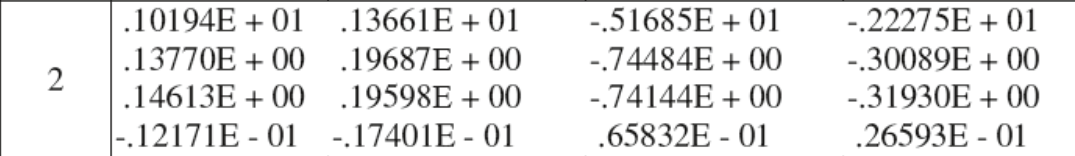

## Создание объекта матрицы/array в Numpy

In [86]:
A = np.array([[.10194E+01, .13661E+01, -.5168E+01, -.22275E+01],
              [.13770E+00, .19687E+00, -.74484E+00, -.30089E+00],
              [.14613E+00, .19598E+00, -.74144E+00, -.31930E+00],
              [.12171E-01, .17401E-01, .65832E-01, .26593E-01]])

A_sympy = sp.Matrix(A)
A_sympy

⎡ 1.0194    1.3661    -5.168   -2.2275 ⎤
⎢                                      ⎥
⎢ 0.1377   0.19687   -0.74484  -0.30089⎥
⎢                                      ⎥
⎢0.14613   0.19598   -0.74144  -0.3193 ⎥
⎢                                      ⎥
⎣0.012171  0.017401  0.065832  0.026593⎦

In [87]:
np.linalg.cond(A) # документация Numpy: число обусловленности (condition number)

663082.0038139601

❗**Высокое значение числа обусловленности**: Значение 663082.00381396 говорит о том, что матрица имеет высокое число обусловленности. Это означает, что небольшие изменения в элементе матрицы (или в входных данных) могут привести к большим изменениям в результирующих решениях (например, в eigenvalues и eigenvectors)

In [88]:
def qr_algorithm(A, num_iterations=200): # 200 итераций
    """Собственные значения при помощи QR алгоритма"""
    # на всякий случай создаем локальную копию нашей матрицы и работаем с ней
    A = A.copy()

    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A) # используем QR-разложение
        A = R @ Q # синоним R.dot(Q)

    # np.diag() диагональ даст собственные значения
    eigenvalues = np.diag(A)

    return eigenvalues

In [89]:
print(qr_algorithm(A),"\n")
np.linalg.eigvals(A)

[ 3.74877363e-01  1.10160391e-01  1.64231562e-02 -3.79101171e-05] 



array([ 2.42518877e-01+0.1057895j,  2.42518877e-01-0.1057895j,
       -3.79101171e-05+0.j       ,  1.64231562e-02+0.j       ])

### Собственные вектора

In [90]:
Q = np.eye(4)
for k in range(200):
  q, R = np.linalg.qr(A)
  Q = Q.dot(q)
  a = R.dot(q)
print(Q)

[[-0.6439149   0.73009429 -0.19979505  0.11143554]
 [-0.02333312 -0.31048093 -0.70231051  0.64016959]
 [-0.59878506 -0.43354271  0.55680753  0.3787645 ]
 [ 0.47569489  0.42732265  0.39598896  0.65901629]]


## Библиотека Sympy: `eigenvects`, `eigenvals`

In [91]:
eigenvects = A_sympy.eigenvects()
eigenvects

⎡⎛                                            ⎡⎡-0.849991293425238 - 0.485235842814371⋅ⅈ ⎤⎤⎞  ⎛    ↪
⎢⎜                                            ⎢⎢                                         ⎥⎥⎟  ⎜    ↪
⎢⎜                                            ⎢⎢-0.103503004712079 - 0.0497737966864991⋅ⅈ⎥⎥⎟  ⎜    ↪
⎢⎜0.242518876935781 - 0.105789496334999⋅ⅈ, 1, ⎢⎢                                         ⎥⎥⎟, ⎜0.2 ↪
⎢⎜                                            ⎢⎢-0.121694932167762 - 0.0693515899898931⋅ⅈ⎥⎥⎟  ⎜    ↪
⎢⎜                                            ⎢⎢                                         ⎥⎥⎟  ⎜    ↪
⎣⎝                                            ⎣⎣-0.0545388913625884 - 0.079226794129244⋅ⅈ⎦⎦⎠  ⎝    ↪

↪                                          ⎡⎡ -0.48699154601128 - 0.853066771985428⋅ⅈ ⎤⎤⎞  ⎛       ↪
↪                                          ⎢⎢                                         ⎥⎥⎟  ⎜       ↪
↪                                          ⎢⎢-0.0499538905836397 - 0.103877504162096⋅ⅈ⎥⎥⎟ 

In [92]:
[eigenvect[0] for eigenvect in eigenvects]

[0.242518876935781 - 0.105789496334999⋅ⅈ, 0.242518876935781 + 0.105789496334999⋅ⅈ, 0.0164231562454 ↪

↪ 955, -3.79101170565834e-5]

In [93]:
A_sympy.eigenvals() # собственные значения при помощи библиотеки Sympy

{-3.79101170565834e-5: 1, 0.0164231562454955: 1, 0.242518876935781 - 0.105789496334999⋅ⅈ: 1, 0.242 ↪

↪ 518876935781 + 0.105789496334999⋅ⅈ: 1}

`:1 (,1)` обозначает, что каждое собственное значение встречается один раз и не имеет кратности. Если бы у собственных значений была бы большая кратность, например, `:2`, это означало бы, что это собственное значение имеет кратность 2, и, следовательно, связано с двумя линейно независимыми собственными векторами

Т.к. нет кратности, матрицу можно диагонализировать ◀

In [96]:
A_sympy.diagonalize()

⎛⎡-0.849991293425238 - 0.485235842814371⋅ⅈ    -0.48699154601128 - 0.853066771985428⋅ⅈ   0.07559652 ↪
⎜⎢                                                                                                 ↪
⎜⎢-0.103503004712079 - 0.0497737966864991⋅ⅈ  -0.0499538905836397 - 0.103877504162096⋅ⅈ  -0.0710772 ↪
⎜⎢                                                                                                 ↪
⎜⎢-0.121694932167762 - 0.0693515899898931⋅ⅈ  -0.0696025211815168 - 0.122135254507132⋅ⅈ  0.00979878 ↪
⎜⎢                                                                                                 ↪
⎝⎣-0.0545388913625884 - 0.079226794129244⋅ⅈ  -0.079513456249929 - 0.0547362265498774⋅ⅈ  -0.0322860 ↪

↪ 39232134 - 2.20290702348286e-66⋅ⅈ    0.270401223750955 - 3.93240517922464e-64⋅ⅈ ⎤  ⎡0.2425188769 ↪
↪                                                                                 ⎥  ⎢             ↪
↪ 362518605 + 4.50140636668209e-67⋅ⅈ   -0.189244327217298 - 4.6312834054363e-65⋅ⅈ ⎥  ⎢    

In [106]:
lamda = sp.symbols('lamda')
p = A_sympy.charpoly(lamda)
p.as_expr()

     4             3                  2                                              
1.0⋅λ  - 0.501423⋅λ  + 0.07795366358⋅λ  - 0.00114677704254719⋅λ - 4.35865125089424e-8

## Библиотека Numpy: `linalg.eig()`

In [100]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)

Eigenvalues: 
 [ 2.42518877e-01+0.1057895j  2.42518877e-01-0.1057895j
 -3.79101171e-05+0.j         1.64231562e-02+0.j       ]
Eigenvectors: 
 [[ 0.97874359+0.j          0.97874359-0.j         -0.75930874+0.j
   0.69284044+0.j        ]
 [ 0.1145639 +0.008088j    0.1145639 -0.008088j    0.53141354+0.j
  -0.65142127+0.j        ]
 [ 0.14006887+0.00010472j  0.14006887-0.00010472j  0.14076696+0.j
   0.08980567+0.j        ]
 [ 0.08664298-0.04176565j  0.08664298+0.04176565j -0.34818753+0.j
  -0.29590097+0.j        ]]


## Scipy (eigvals, eig)

In [101]:
eigenvalues, eigenvectors = eig(A) # нет отличий от numpy, Scipy = numpy+

print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)

Eigenvalues: 
 [ 2.42518877e-01+0.1057895j  2.42518877e-01-0.1057895j
 -3.79101171e-05+0.j         1.64231562e-02+0.j       ]
Eigenvectors: 
 [[ 0.97874359+0.j          0.97874359-0.j         -0.75930874+0.j
   0.69284044+0.j        ]
 [ 0.1145639 +0.008088j    0.1145639 -0.008088j    0.53141354+0.j
  -0.65142127+0.j        ]
 [ 0.14006887+0.00010472j  0.14006887-0.00010472j  0.14076696+0.j
   0.08980567+0.j        ]
 [ 0.08664298-0.04176565j  0.08664298+0.04176565j -0.34818753+0.j
  -0.29590097+0.j        ]]


In [ ]:
#from google.colab import drive#
#drive.mount('/content/drive')#

In [ ]:
#!jupyter nbconvert --to html /content/drive/MyDrive/'Colab Notebooks'/'Lab_2_eigen.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Lab_2_eigen.ipynb to html
[NbConvertApp] Writing 431268 bytes to /content/drive/MyDrive/Colab Notebooks/Lab_2_eigen.html
